In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Input data
theta_star = np.array([1.0,0.1])
X = np.random.randn(100,2) 
y =X @ theta_star + np.random.randn(100)*0.000

In [50]:
# Compute cost function with L1 regularization
def cost_function(X, y, theta, lambda_param):
    m = len(y)
    J = (np.sum((X.dot(theta) - y) ** 2) / (2 * m)) + (lambda_param * np.sum(np.abs(theta)))
    return J

# Gradient descent with L1 regularization
def gradient_descent_step(X, y, theta, alpha, lambda_param, iterations=1):
    m = len(y)
    for _ in range(iterations):
        theta = theta - (alpha) * ( X.T.dot(X.dot(theta) - y)/m + (lambda_param * np.sign(theta)))
    return theta

In [55]:
# Initialize weights
theta = np.array([0.5, 0.5])

# Set learning rate, number of iterations and regularization parameter
alpha = 0.05
iterations = 100
lambda_param = .2

loss = []
err = []
thetas = []
for k in range(iterations):
    loss.append(cost_function(X, y, theta, lambda_param))
    err.append(cost_function(X, y, theta, 0))
    thetas.append(theta)
    
    theta = gradient_descent_step(X, y, theta, alpha, lambda_param, iterations=1)
   

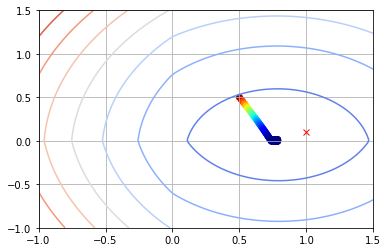

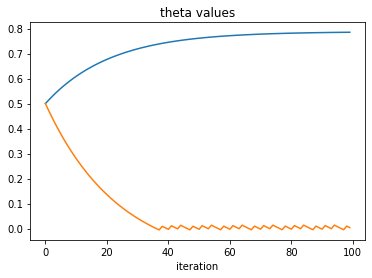

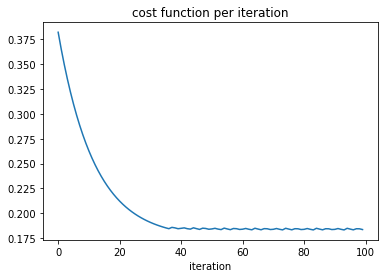

In [56]:
theta_min, theta_max = -1,1.5
_x = np.linspace(theta_min, theta_max, 100)
_y = np.linspace(theta_min, theta_max, 100)
_X, _Y = np.meshgrid(_x, _y)
Z = np.zeros(_X.shape)
for i in range(_X.shape[0]):
    for j in range(_X.shape[1]):
        _theta = np.array([_X[i,j],_Y[i,j]])
        Z[i,j] = cost_function(X, y, _theta, lambda_param)
        
plt.contour(_X, _Y, Z, cmap='coolwarm')
thetas = np.array(thetas)
plt.scatter(thetas[:,0],thetas[:,1],c=loss,cmap='jet')    
plt.plot(theta_star[0],theta_star[1],'rx')
plt.grid('on')
plt.show()

plt.plot(thetas)
plt.title('theta values')
plt.xlabel('iteration')
plt.show()

plt.plot(loss)
plt.title('cost function per iteration')
plt.xlabel('iteration')
plt.show()